# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
<!-- ![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png) -->
2. Scroll down to API and click Create New API Token.
<!-- ![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png) -->
3. Open up `kaggle.json` and use the username and key.
<!-- ![kaggle5.png](attachment:kaggle5.png) -->

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.4/908.4 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 49.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=97f66c777a41f5d12aac3095a9d3305a8c2606a82d7d55f861958e25ec92b2e0
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.3.4
    Uninstalling bokeh-3.3.4:
      Successfully uninstalled bokeh-3.3.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.3.8 requires bokeh<3.4.0,

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "maryam1158cs"
kaggle_key = "2e6d9166f27dfbc6e1dd39d55d73a062"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
<!-- ![kaggle6.png](attachment:kaggle6.png) -->

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 46.9MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
print(train.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


In [9]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(label="count",eval_metric= "root_mean_squared_error").fit(train_data=train.drop(["casual", "registered"],axis=1),time_limit= 600, presets= 'best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240718_135249"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.14 GB / 12.67 GB (87.9%)
Disk Space Avail:   76.33 GB / 107.72 GB (70.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=3256) [1000]	valid_set's rmse: 129.692
(_ray_fit pid=3256) [3000]	valid_set's rmse: 128.461 [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(_ray_fit pid=3448) [1000]	valid_set's rmse: 132.725
(_ray_fit pid=3495) [1000]	valid_set's rmse: 128.154
(_ray_fit pid=3495) [2000]	valid_set's rmse: 126.702
(_ray_fit pid=3495) [3000]	valid_set's rmse: 126.147
(_ray_fit pid=3495) [4000]	valid_set's rmse: 125.904
(_ray_fit pid=3569) [1000]	valid_set's rmse: 135.845
(_ray_fit pid=3569) [3000]	valid_set's rmse: 133.639 [repeated 4x across cluster]
(_ray_fit pid=3569) [6000]	valid_set's rmse: 132.628 [repeated 3x across cluster]
(_ray_fit pid=3705) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=3705) [2000]	valid_set's rmse: 136.347
(_ray_fit pid=3705) [3000]	valid_set's rmse: 135.865
(_ray_fit pid=3705) [4000]	va

(_dystack pid=3086) 	-131.9992	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3086) 	100.62s	 = Training   runtime
(_dystack pid=3086) 	23.75s	 = Validation runtime
(_dystack pid=3086) Fitting model: WeightedEnsemble_L2 ... Training model for up to 140.08s of the 23.98s of remaining time.
(_dystack pid=3086) 	Ensemble Weights: {'KNeighborsDist_BAG_L1': 1.0}
(_dystack pid=3086) 	-89.9469	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3086) 	0.02s	 = Training   runtime
(_dystack pid=3086) 	0.0s	 = Validation runtime
(_dystack pid=3086) Fitting 106 L2 models ...
(_dystack pid=3086) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 23.95s of the 23.92s of remaining time.
(_dystack pid=3086) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)


(_ray_fit pid=3921) [1000]	valid_set's rmse: 70.7934 [repeated 2x across cluster]
(_ray_fit pid=4029) [1000]	valid_set's rmse: 78.2997 [repeated 2x across cluster]
(_ray_fit pid=4147) [1000]	valid_set's rmse: 77.0972
(_ray_fit pid=4142) [1000]	valid_set's rmse: 76.0871
(_ray_fit pid=4250) [1000]	valid_set's rmse: 72.5861
(_ray_fit pid=4287) [1000]	valid_set's rmse: 75.6118


(_dystack pid=3086) 	-74.3367	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3086) 	52.46s	 = Training   runtime
(_dystack pid=3086) 	4.44s	 = Validation runtime
(_dystack pid=3086) Fitting model: WeightedEnsemble_L3 ... Training model for up to 140.08s of the -36.93s of remaining time.
(_dystack pid=3086) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 0.96, 'KNeighborsDist_BAG_L1': 0.04}
(_dystack pid=3086) 	-74.3099	 = Validation score   (-root_mean_squared_error)
(_dystack pid=3086) 	0.09s	 = Training   runtime
(_dystack pid=3086) 	0.0s	 = Validation runtime
(_dystack pid=3086) AutoGluon training complete, total runtime = 177.29s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 42.9 rows/s (1210 batch size)
(_dystack pid=3086) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240718_135249/ds_sub_fit/sub_fit_ho")
(_dystack pid=3086) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leaderboard on 

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.124109  root_mean_squared_error      43.206676  377.192475                0.001564           0.065914            3       True         10
1         LightGBM_BAG_L2  -55.200034  root_mean_squared_error      29.299053  284.281024                0.331557          41.796330            2       True          9
2       LightGBMXT_BAG_L2  -60.461232  root_mean_squared_error      42.873556  335.330231               13.906059          92.845537            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.060037    0.038415                0.060037           0.038415            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.061069    0.070468         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -132.32548496198078,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.46123194202655,
  'LightGBM_BAG_L2': -55.200033961319235,
  'WeightedEnsemble_L3': -55.124109145883615

### Create predictions from test dataset

In [14]:
predictions = predictor.predict(test)

predictions.head()

0    36.851158
1    44.961361
2    49.120407
3    53.228363
4    54.199455
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [15]:
# Describe the `predictions` series to see if there are any negative values
print(predictions.describe())

count    6493.000000
mean       99.678772
std        89.865341
min        -9.837612
25%        16.177139
50%        63.936897
75%       173.006226
max       367.663086
Name: count, dtype: float64


In [17]:
# How many negative values do we have?
print(f"Number of negative predictions: {(predictions < 0).sum()}")

Number of negative predictions: 2


In [18]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 993kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2024-07-18 14:10:35  first raw submission  complete  1.84171      1.84171       
submission_new_features.csv  2024-07-17 14:17:48  new features          complete  0.62188      0.62188       
submission.csv               2024-07-17 13:21:17  first raw submission  complete  1.80409      1.80409       


#### Initial score of `1.84171`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

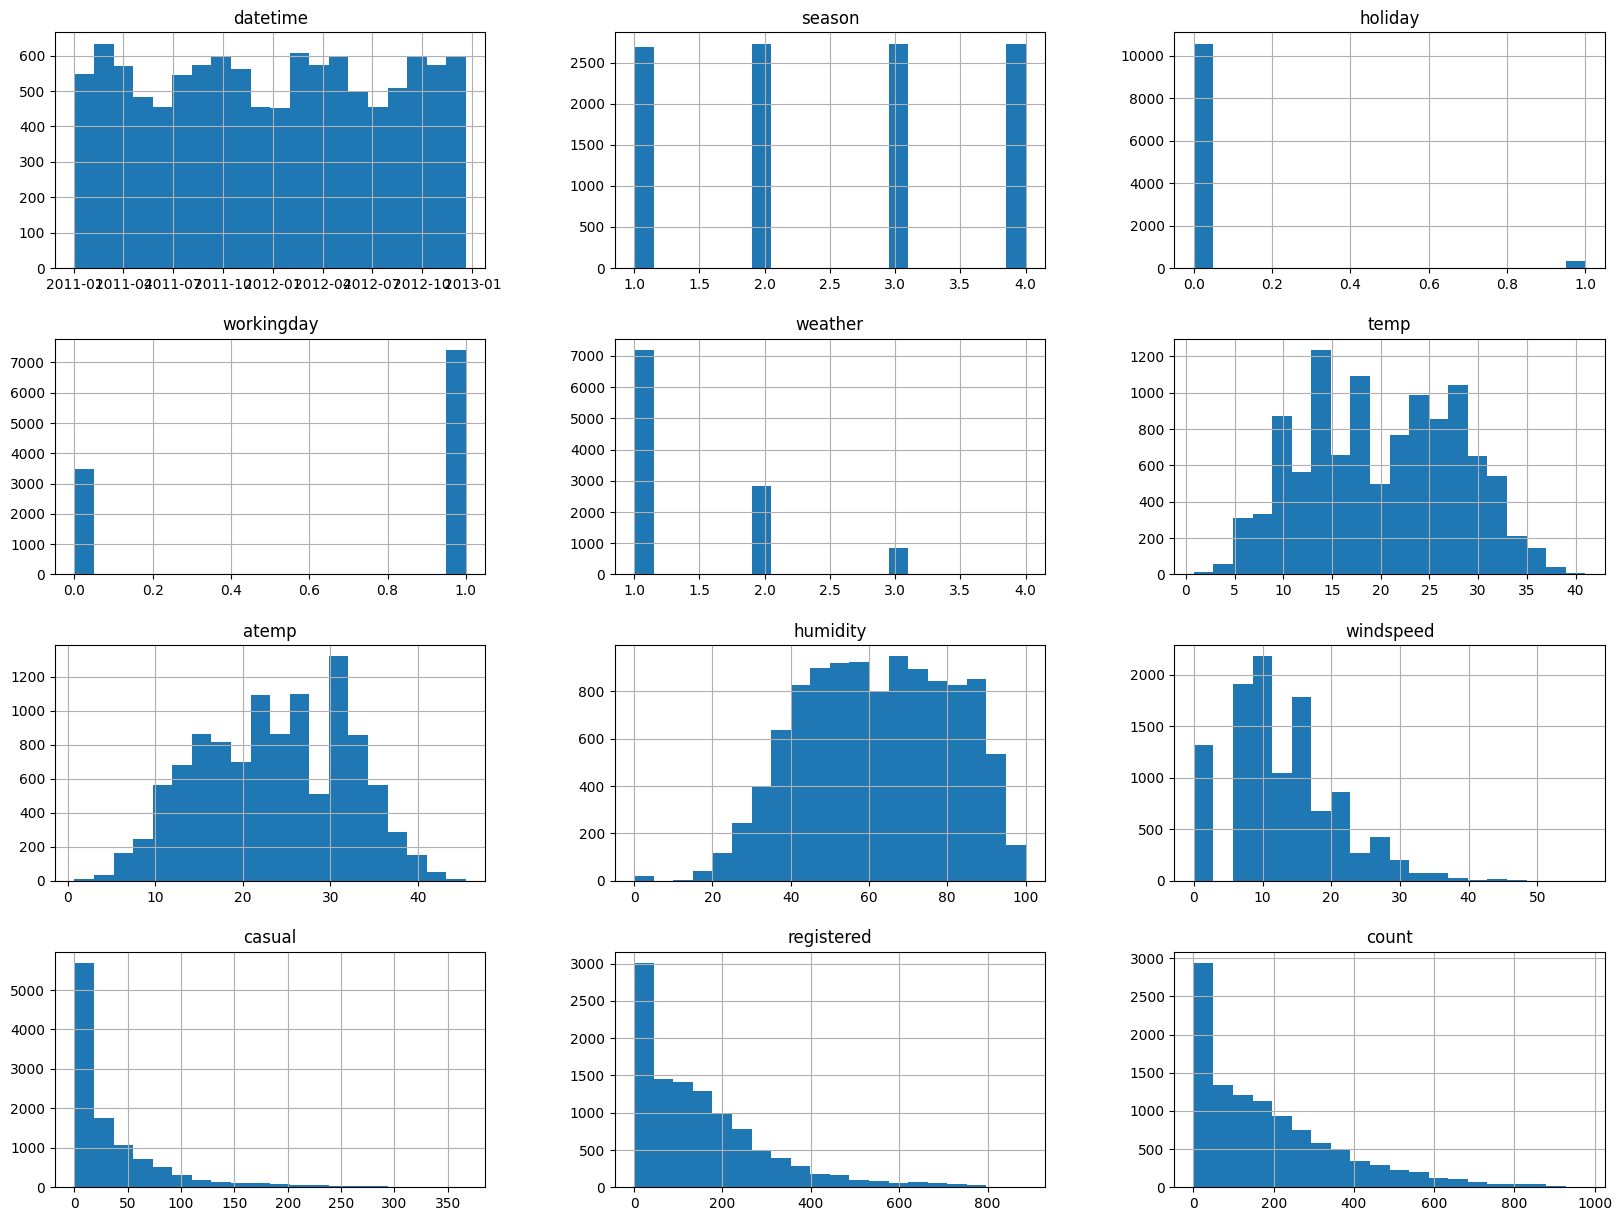

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins=20, figsize=(20,15))

In [23]:
#separate out the datetime into hour, day, or month parts.
train['hour'] =train.datetime.dt.hour
train['day'] = train.datetime.dt.day
train['month'] = train.datetime.dt.month
# create a new feature
test['hour'] =test.datetime.dt.hour
test['day'] = test.datetime.dt.day
test['month'] = test.datetime.dt.month

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [24]:
train["season"] = train["season"].astype("category")
train["weather"] = train['weather'].astype("category")
train["holiday"] = train["holiday"].astype("category")
train["workingday"] = train["workingday"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] =test['weather'].astype("category")
test["holiday"] = test["holiday"].astype("category")
test["workingday"] = test["workingday"].astype("category")

<Axes: >

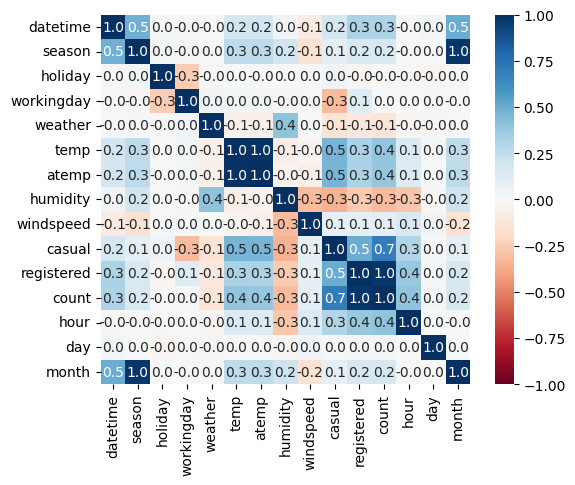

In [25]:
import seaborn as sns
#correlation between features
correlation = train.corr()
# plot the heatmap
sns.heatmap(correlation,
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            annot=True, fmt="0.1f",
            cmap="RdBu", vmin=-1, vmax=1, center=0,square=True)

In [26]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

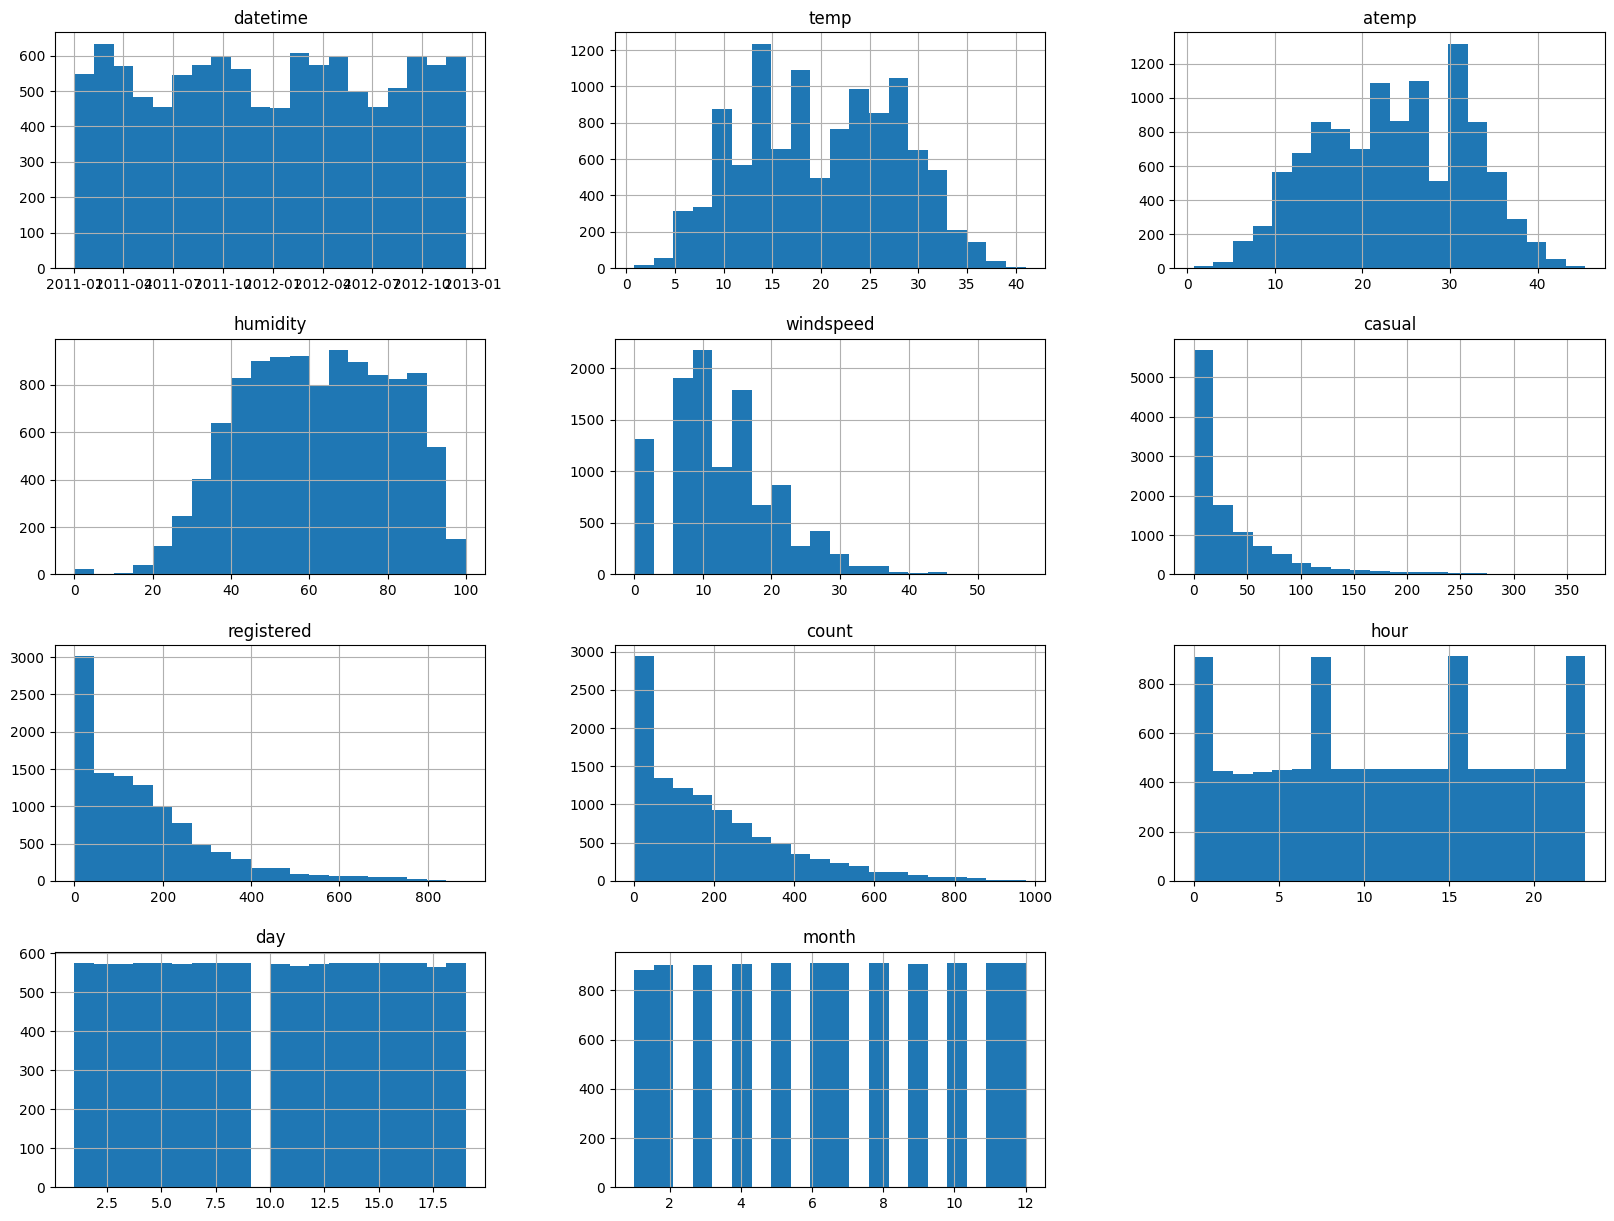

In [27]:
# View histogram of all features again now with the hour feature
train.hist(bins=20, figsize=(20,15))

## Step 5: Rerun the model with the same settings as before, just with more features

In [28]:
predictor_new_features = TabularPredictor(label="count",eval_metric= "root_mean_squared_error").fit(train_data=train.drop(["casual", "registered"],axis=1),time_limit= 600, presets= 'best_quality')


No path specified. Models will be saved in: "AutogluonModels/ag-20240718_142328"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.11 GB / 12.67 GB (79.8%)
Disk Space Avail:   75.89 GB / 107.72 GB (70.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [29]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -30.544245  root_mean_squared_error      64.596866  378.101215                0.001463           0.045750            3       True          9
1         LightGBM_BAG_L2  -30.775806  root_mean_squared_error      60.102166  306.985498                0.497364          51.723151            2       True          8
2       LightGBMXT_BAG_L2  -31.360494  root_mean_squared_error      64.098039  326.332315                4.493236          71.069968            2       True          7
3     WeightedEnsemble_L2  -32.419553  root_mean_squared_error      59.505911  255.266673                0.001652           0.057649            2       True          6
4         LightGBM_BAG_L1  -33.916920  root_mean_squared_error       9.060568   72.472256         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.51903091052072,
  'LightGBM_BAG_L1': -33.916920183145294,
  'RandomForestMSE_BAG_L1': -38.40890681984868,
  'WeightedEnsemble_L2': -32.419552668761895,
  'LightGBMXT_BAG_L2': -31.360494223239872,
  'LightGBM_BAG_L2': -30.77580595021584,
  'WeightedEnsemble_L3': -30.54424519414021},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': ['KNeighborsU

In [30]:
# Remember to set all negative values to zero
print(f"Number of negative predictions: {(predictions < 0).sum()}")

Number of negative predictions: 0


In [31]:
# Set them to zero
predictions[predictions < 0] = 0

In [32]:
# Same submitting predictions
new_predictions = predictor_new_features.predict(test)
submission_new_features =submission.copy()
submission_new_features["count"] = new_predictions
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [33]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 1.01MB/s]
Successfully submitted to Bike Sharing Demand

In [34]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-07-18 14:37:56  new features          complete  0.61717      0.61717       
submission.csv               2024-07-18 14:10:35  first raw submission  complete  1.84171      1.84171       
submission_new_features.csv  2024-07-17 14:17:48  new features          complete  0.62188      0.62188       
submission.csv               2024-07-17 13:21:17  first raw submission  complete  1.80409      1.80409       


#### New Score of `0.61717`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [68]:
hyperparameters = {
    "GBM": {"num_boost_round": 500},
    "RF": {"n_estimators": 500},
}
hyperparameter_tune_kwargs = {
    "searcher": "bayes",
    "scheduler": "local",
    "num_trials": 5
}
predictor_new_hpo = TabularPredictor(label="count",eval_metric= "root_mean_squared_error").fit(train_data=train.drop(["casual", "registered"],axis=1),time_limit= 600, presets= 'best_quality',hyperparameter_tune_kwargs=hyperparameter_tune_kwargs, hyperparameters=hyperparameters)


No path specified. Models will be saved in: "AutogluonModels/ag-20240718_155954"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.08 GB / 12.67 GB (79.5%)
Disk Space Avail:   75.43 GB / 107.72 GB (70.0%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.12%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-35.0956	 = Validation score   (-root_mean_squared_error)
	54.57s	 = Training   runtime
	1.86s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-34.1608	 = Validation score   (-root_mean_squared_error)
	53.41s	 = Training   runtime
	1.65s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L1 ... Tuning model for up to 111.46s of the 263.41s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForest_BAG_L1 ...
	-38.2511	 = Validation score   (-root_mean_squared_error)
	46.47s	 = Training   runtime

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.09%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.14%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-34.3316	 = Validation score   (-root_mean_squared_error)
	46.34s	 = Training   runtime
	0.17s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-34.9719	 = Validation score   (-root_mean_squared_error)
	55.25s	 = Training   runtime
	0.47s	 = Validation runtime
Hyperparameter tuning model: RandomForest_BAG_L2 ... Tuning model for up to 97.53s of the 114.91s of remaining time.
	No hyperparameter search space specified for RandomForest_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: RandomForest_BAG_L2 ...
	-34.2877	 = Validation score   (-root_mean_squared_error)
	85.54s	 = Training   runtime


In [69]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -33.423372  root_mean_squared_error       6.514850  240.017925                0.001620           0.040107            3       True          8
1  WeightedEnsemble_L2 -33.554371  root_mean_squared_error       4.966520  154.465935                0.001230           0.023993            2       True          4
2   LightGBM_BAG_L1/T2 -34.160824  root_mean_squared_error       1.653765   53.406208                1.653765          53.406208            1       True          2
3  RandomForest_BAG_L2 -34.287736  root_mean_squared_error       6.513229  239.977818                1.547940          85.535876            2       True          7
4   LightGBM_BAG_L2/T1 -34.331571  root_mean_squared_error       5.136647  200.785743                0.171357         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -35.09563444345536,
  'LightGBM_BAG_L1/T2': -34.160823809712056,
  'RandomForest_BAG_L1': -38.25113866738311,
  'WeightedEnsemble_L2': -33.55437088365854,
  'LightGBM_BAG_L2/T1': -34.33157090792445,
  'LightGBM_BAG_L2/T2': -34.9719258971324,
  'RandomForest_BAG_L2': -34.287736374792146,
  'WeightedEnsemble_L3': -33.423372421050225},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1/T1': ['LightGBM_BAG_L1', 'T1'],
  'LightGBM_BAG_L1/T2': ['LightGBM_BAG_L1', 'T2'],
  'RandomForest_BAG_L1': ['RandomFore

In [71]:
predictions_new_hpo = predictor_new_hpo.predict(test)
# Set them to zero
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [72]:
# Remember to set all negative values to zero
print(f"Number of negative predictions: {(predictions < 0).sum()}")

Number of negative predictions: 0


In [73]:
# Same submitting predictions
submission_new_hpo =submission.copy()
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [74]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 762kB/s]
Successfully submitted to Bike Sharing Demand

In [75]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-07-18 16:12:24  new features with hyperparameters  complete  0.48847      0.48847       
submission_new_features.csv  2024-07-18 14:37:56  new features                       complete  0.61717      0.61717       
submission.csv               2024-07-18 14:10:35  first raw submission               complete  1.84171      1.84171       
submission_new_features.csv  2024-07-17 14:17:48  new features                       complete  0.62188      0.62188       


#### New Score of `0.48847`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

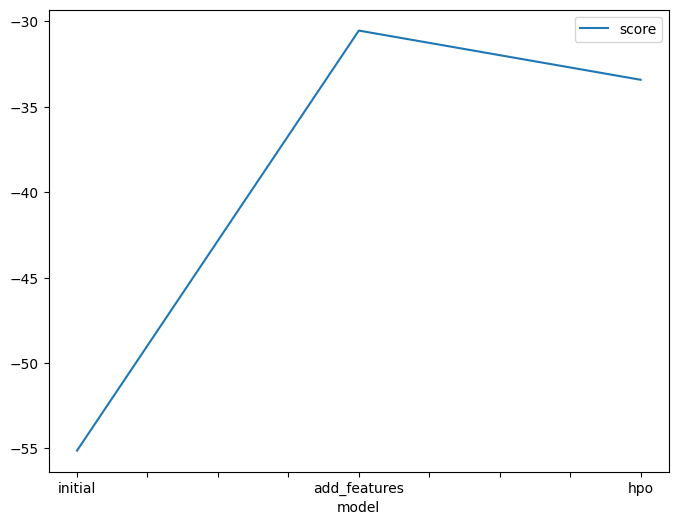

In [87]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [
          predictor.leaderboard(silent=True)['score_val'][0],
          predictor_new_features.leaderboard(silent=True)['score_val'][0],
          predictor_new_hpo.leaderboard(silent=True)['score_val'][0]
      ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

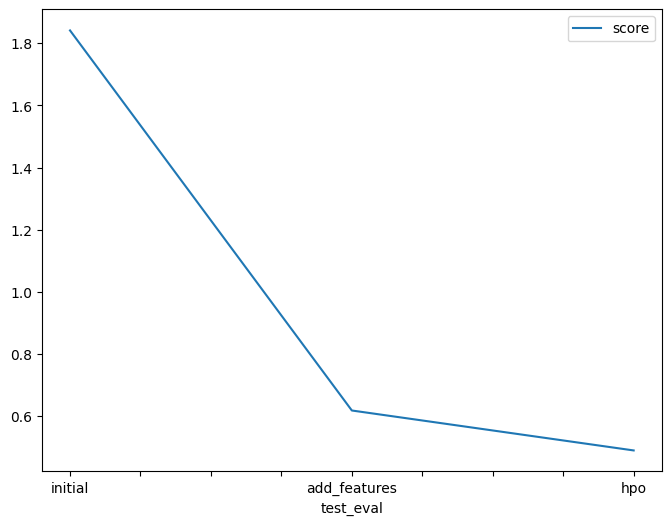

In [76]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.84171, 0.61717, 0.48847]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [78]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "time": [600, 600, 600],
    "eval_metric": ["root_mean_squared_error", "root_mean_squared_error", "root_mean_squared_error"],
    "hyperparameter": ["default", "default", "'num_boost_round':500, 'n_estimators':500, 'searcher':bayes, 'scheduler':local, 'num_trials':5"],
    "score": [1.84171, 0.61717, 0.48847]
})



,model,time,eval_metric,hyperparameter,score
0,initial,600,root_mean_squared_error,default,1.84171
1,add_features,600,root_mean_squared_error,default,0.61717
2,hpo,600,root_mean_squared_error,"'num_boost_round':500, 'n_estimators':500, 'se...",0.48847
